In [4]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import math

In [45]:
thresh_angles = np.array([10, 20, 25, 30, 40, 50, 60, 70, 80, 90])

M1 = np.loadtxt("prob2bisNico10deg.txt")
M2 = np.loadtxt("prob2bisNico20deg.txt")
M2bis = np.loadtxt("prob2bisNico25deg.txt")
M3 = np.loadtxt("prob2bisNico30deg.txt")
M4 = np.loadtxt("prob2bisNico40deg.txt")
M5 = np.loadtxt("prob2bisNico50deg.txt")
M6 = np.loadtxt("prob2bisNico60deg.txt")
M7 = np.loadtxt("prob2bisNico70deg.txt")
M8 = np.loadtxt("prob2bisNico80deg.txt")

M9 = np.loadtxt("prob2bisStandard.txt")


M = [M1, M2, M2bis, M3, M4, M5, M6, M7, M8, M9]
min_len = float("inf")
for i in range(thresh_angles.shape[0]):
    if(M[i].shape[0] < min_len):
        min_len = M[i].shape[0]
for i in range(thresh_angles.shape[0]):
    M[i] = M[i][:min_len,:]
    M[i][:,0] = np.linspace(3.66, 38.84, min_len)
    print(M[i].shape)
    


(534, 16)
(534, 16)
(534, 16)
(534, 16)
(534, 16)
(534, 16)
(534, 16)
(534, 16)
(534, 16)
(534, 16)


In [46]:
p = np.zeros(thresh_angles.shape[0])
p_right = np.zeros(thresh_angles.shape[0])
middle = int(M[0][:,2:-1].shape[1]/2)+1

for i in range(thresh_angles.shape[0]):
    p[i] = np.nanmean(M[i][:,2:-1], axis=(0,1))
    p_right[i] = np.nanmean(M[i][:,2:middle+1], axis=(0,1))

print(p)
print(p_right)

[0.7508558  0.77525468 0.78942461 0.77608793 0.75858553 0.73049659
 0.73532476 0.71512266 0.70731056 0.71173786]
[0.67791953 0.74807857 0.77344101 0.74137839 0.70273122 0.65083755
 0.65175475 0.60602526 0.60286975 0.60651979]


Text(0,0.5,'Probability of measurement')

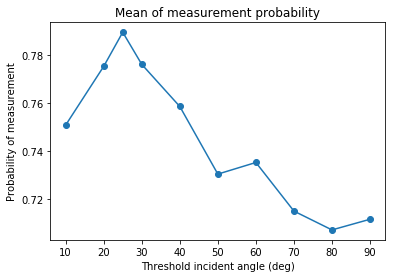

In [60]:
plt.plot(thresh_angles, p, 'o-')
plt.title('Mean of measurement probability')
plt.xlabel('Threshold incident angle (deg)')
plt.ylabel('Probability of measurement')

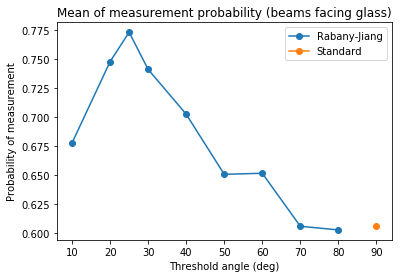

In [66]:
plt.plot(thresh_angles[:-1], p_right[:-1], 'o-', label='Rabany-Jiang')
plt.plot(thresh_angles[-1], p_right[-1], 'o-', label='Standard')
plt.title('Mean of measurement probability (beams facing glass)')
plt.xlabel('Threshold angle (deg)')
plt.ylabel('Probability of measurement')
plt.legend()

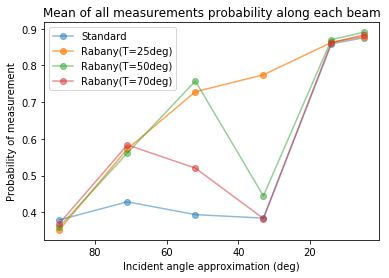

In [105]:
step = 135*2 / M[0][:,1:].shape[1]+1
alpha = (np.arange(M[0][:,2:-1].shape[1])-round(M[0][:,2:-1].shape[1]/2))*step
alpha = abs(90+alpha)
#for i in range(thresh_angles.shape[0]):
#    plt.plot(alpha, np.nanmean(M[i][:,2:-1],axis=0), 'o-', alpha=0.5)
plt.plot(alpha[1:-6], np.nanmean(M[8][:,2+1:-1-6],axis=0), 'o-', alpha=0.5, label='Standard') 
plt.plot(alpha[1:-6], np.nanmean(M[2][:,2+1:-1-6],axis=0), 'o-', alpha=0.7, label='Rabany(T=25deg)')
plt.plot(alpha[1:-6], np.nanmean(M[4][:,2+1:-1-6],axis=0), 'o-', alpha=0.5, label='Rabany(T=50deg)')
plt.plot(alpha[1:-6], np.nanmean(M[6][:,2+1:-1-6],axis=0), 'o-', alpha=0.5, label='Rabany(T=70deg)')
plt.title('Mean of all measurements probability along each beam')
plt.xlabel('Incident angle approximation (deg)')
plt.ylabel('Probability of measurement')

plt.gca().invert_xaxis()
plt.legend()

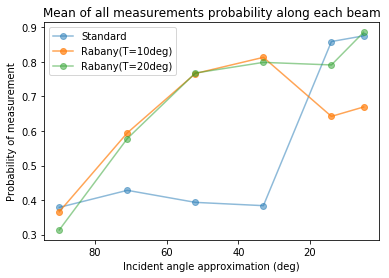

In [106]:
plt.plot(alpha[1:-6], np.nanmean(M[8][:,2+1:-1-6],axis=0), 'o-', alpha=0.5, label='Standard')
plt.plot(alpha[1:-6], np.nanmean(M[0][:,2+1:-1-6],axis=0), 'o-', alpha=0.7, label='Rabany(T=10deg)')
plt.plot(alpha[1:-6], np.nanmean(M[1][:,2+1:-1-6],axis=0), 'o-', alpha=0.5, label='Rabany(T=20deg)')
plt.title('Mean of all measurements probability along each beam')
plt.xlabel('Incident angle approximation (deg)')
plt.ylabel('Probability of measurement')

plt.gca().invert_xaxis()
plt.legend()

In [103]:
def plot_beam_graph_mult(beam_indexes, thresh_index):
    nb_plots = beam_indexes.shape[0]
    fig, ax = plt.subplots(nb_plots, 1, sharey=True, sharex=True, figsize=(12,3*nb_plots))
    fig.text(0.5, 0.07, 'Time (s)', ha='center')
    fig.text(0.07, 0.5, 'Probability of measurement', va='center', rotation='vertical')
    for i in range(nb_plots):
        ax[i].plot(M[-1][:,0],M[thresh_index][:,beam_indexes[i]+2], label='Rabany-Jiang (T=25deg)', alpha=0.5, color='tab:blue', linewidth=2)
        ax[i].plot(M[-1][:,0],M[-1][:,beam_indexes[i]+2], label='Standard', alpha=0.5, color='tab:orange', linewidth=2)
        ax[i].legend()
        p_nicolas = format(np.nanmean(M[thresh_index][:,beam_indexes[i]+2]),'.2f')
        p_standard = format(np.nanmean(M[-1][:,beam_indexes[i]+2]),'.2f')
        angle = format(alpha[beam_indexes[i]], '.0f')
        ax[i].set_title('incident angle ~={}deg    ($\mu$_nicolas={},  $\mu$_standard={})'.format(angle, p_nicolas, p_standard))

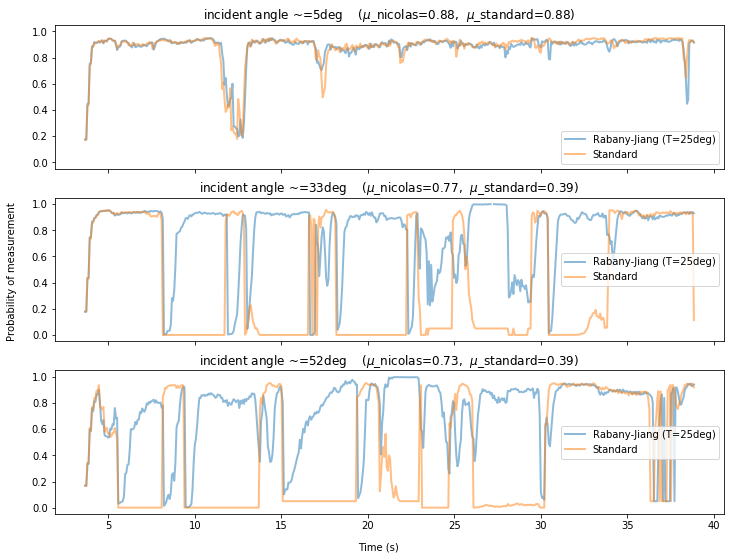

In [104]:
beam_indexes = np.array([1,3,4])
thresh_index = 2
plot_beam_graph_mult(beam_indexes, thresh_index)